In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
matplotlib.rc('font', size=16)

In [2]:
df = pd.read_csv('quantitative-question-ratings.csv')
# Removing questions not measuring sentiment:
#   * "How many days of disaster supplies (e.g., canned food, bottled water, medicine) are immediately available to you in your home?"
#   * "How many weeks has it been since you participated in a disaster drill?"
del df['index'], df['q5'], df['q8']
df.head()

,q1,q2,q3,q4,q6,q7
0,8.0,8.0,8.0,8.0,7.0,1.0
1,0.0,9.0,9.0,9.0,5.0,9.0
2,0.0,9.0,9.0,0.0,9.0,9.0
3,8.0,9.0,9.0,8.0,9.0,9.0
4,9.0,8.0,9.0,7.0,9.0,9.0


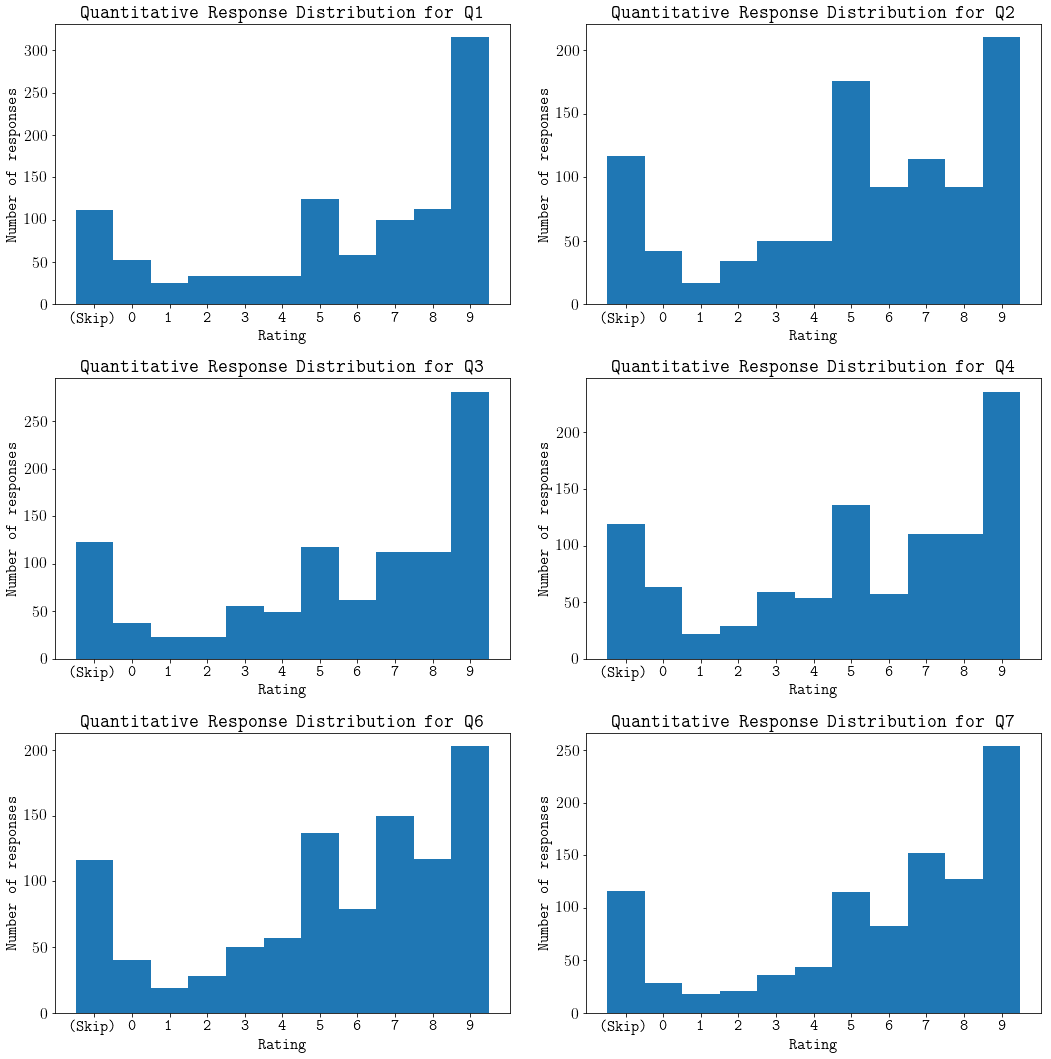

In [3]:
# Plot question distributions
num_columns = 2
num_rows = int(np.ceil(len(df.columns) / float(num_columns)))
figure, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))

for index, question in enumerate(df.columns):
    ratings = df[question].as_matrix()
    ratings[np.isnan(ratings)] = -1

    row, column = index // num_columns, index % num_columns
    ax = axes[row, column]
    ax.set_title('Quantitative Response Distribution for ' + question.upper())
    ax.hist(ratings, 11, [-1.5, 9.5])
    ax.set_xticks(np.arange(-1, 10))
    ax.set_xticklabels(['(Skip)'] + list(range(0, 10)))
    ax.set_xlabel('Rating')
    ax.set_ylabel('Number of responses')

plt.tight_layout()

In [4]:
ratings = df.as_matrix()

means_along_columns = np.nanmean(ratings, axis=0)
print('Mean of each column:', means_along_columns)
# Center ellipsoid at origin, convert missing data to zero (the mean of the column)
normalized_ratings = np.nan_to_num(ratings - means_along_columns)

stdevs_along_columns = np.nanstd(ratings, axis=0)
print('Standard deviation of each column:', stdevs_along_columns)
normalized_ratings /= stdevs_along_columns

Mean of each column: [ 5.61723447  5.17635271  5.47795591  5.15430862  5.31563126  5.67034068]
Standard deviation of each column: [ 3.52229992  3.31858221  3.48989596  3.4889227   3.31504981  3.3479785 ]


<Container object of 3 artists>

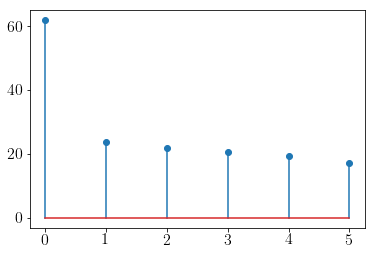

In [5]:
U, S, VT = np.linalg.svd(normalized_ratings)
plt.stem(S)

In [6]:
n = 2  # Take the first two most significant principal components (see singular values above)
first_component, second_component = VT[:n]
print('First principal component is:', np.round(first_component, 3))
print('Second principal component is:', np.round(second_component, 3))

First principal component is: [-0.366 -0.403 -0.417 -0.416 -0.417 -0.429]
Second principal component is: [-0.91  -0.016  0.158  0.163  0.221  0.265]


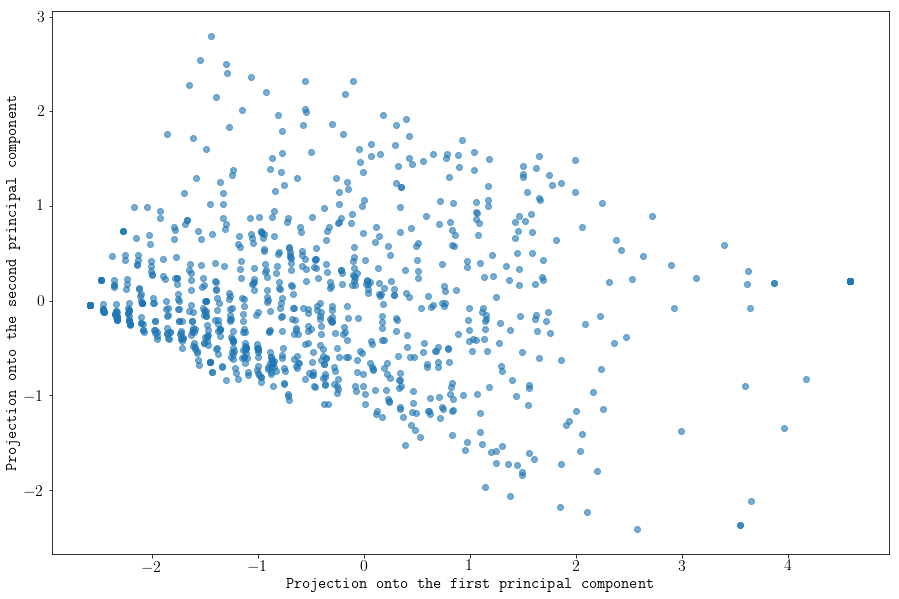

In [7]:
# Taking the transpose of `normalized_ratings`: first participant -> first column, etc.
x = first_component.dot(normalized_ratings.T)
y = second_component.dot(normalized_ratings.T)
plt.figure(figsize=(15, 10))
plt.xlabel('Projection onto the first principal component')
plt.ylabel('Projection onto the second principal component')
plt.scatter(x, y, alpha=0.6)